In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
start ='2012-01-01'
end ='2022-12-31'
stock='AAPL'
data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace=True)

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449691,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516600,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655556,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787855,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767570,394024400
...,...,...,...,...,...,...,...
2763,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900
2764,2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307236,69007800
2765,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339417,85438400
2766,2022-12-29,127.989998,130.479996,127.730003,129.610001,128.889572,75703700


In [5]:
ma_100_days = data.Close.rolling(100).mean()

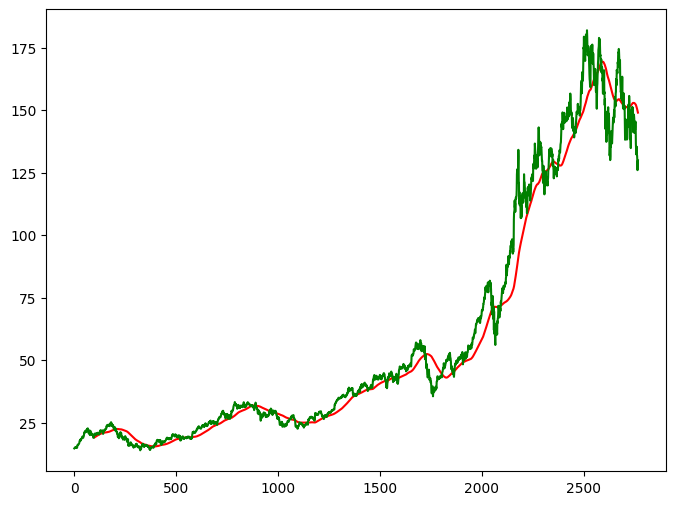

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

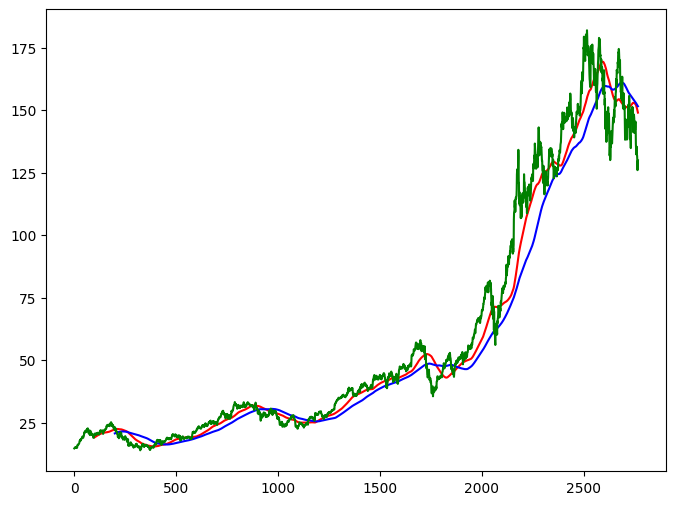

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2214

In [13]:
data_test.shape[0]

554

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x=[]
y=[]
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [17]:
x,y = np.array(x), np.array(y)

In [18]:
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences=True,
               input_shape =((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 80, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [20]:
model.compile(optimizer ='adam', loss='mean_squared_error')

In [21]:
model.fit(x,y, epochs=50,batch_size =32,verbose =1)

Epoch 1/50
67/67 [==============================] - 20s 210ms/step - loss: 0.0188
Epoch 2/50
67/67 [==============================] - 14s 209ms/step - loss: 0.0043
Epoch 3/50
67/67 [==============================] - 14s 207ms/step - loss: 0.0038
Epoch 4/50
67/67 [==============================] - 14s 207ms/step - loss: 0.0044
Epoch 5/50
67/67 [==============================] - 14s 207ms/step - loss: 0.0037
Epoch 6/50
67/67 [==============================] - 14s 206ms/step - loss: 0.0032
Epoch 7/50
67/67 [==============================] - 14s 205ms/step - loss: 0.0026
Epoch 8/50
67/67 [==============================] - 14s 208ms/step - loss: 0.0026
Epoch 9/50
67/67 [==============================] - 14s 210ms/step - loss: 0.0026
Epoch 10/50
67/67 [==============================] - 14s 208ms/step - loss: 0.0024
Epoch 11/50
67/67 [==============================] - 14s 207ms/step - loss: 0.0022
Epoch 12/50
67/67 [==============================] - 14s 209ms/step - loss: 0.0026
Epoch 13/50
6

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 80)                5

In [23]:
pas_100_days = data_train.tail(100)

In [24]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [26]:
data_test_scale = scaler.fit_transform(data_test)

In [28]:
x=[]
y=[]
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [29]:
y_predict = model.predict(x)

18/18 [==============================] - 1s 54ms/step


In [34]:
scale = 1/scaler.scale_

In [35]:
y_predict = y_predict*scale

In [36]:
y = y*scale

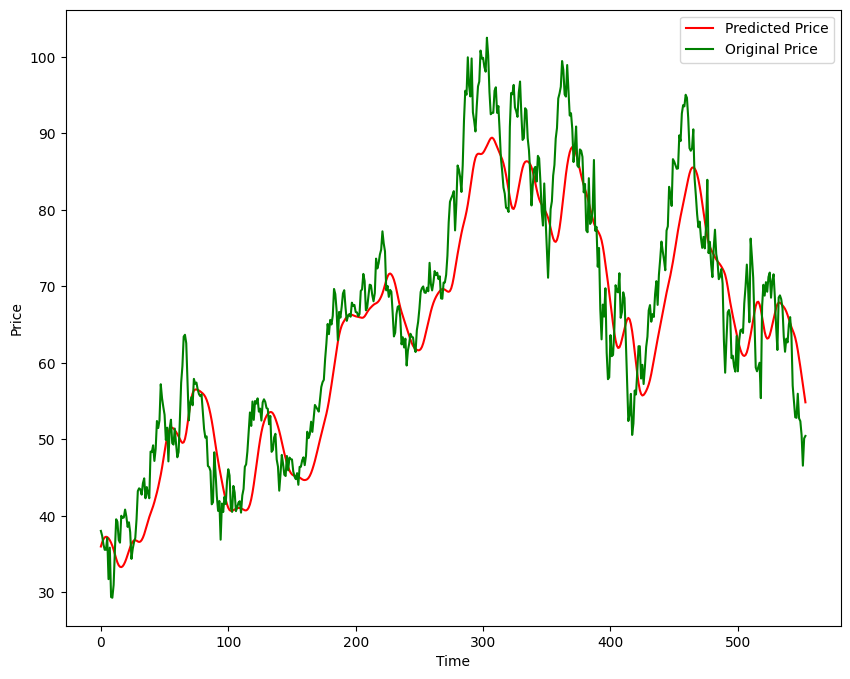

In [37]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r', label='Predicted Price')
plt.plot(y,'g', label ='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [38]:
model.save('Stock Trend Predictions Model.keras')